# Look into relationship between rides and weather data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3

In [2]:
con1 = sqlite3.connect('data/citibike_database.db3')
con2 = sqlite3.connect('data/nyc_weather.db3')

In [5]:
rides = pd.read_sql_query("SELECT yday,count(*) as num_rides FROM rides WHERE year=2015 GROUP BY yday",con1)
rides.head()

,yday,num_rides
0,1,5317
1,2,11304
2,3,4478
3,4,7849
4,5,14506


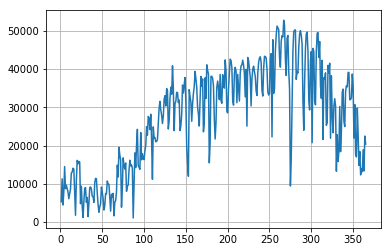

In [11]:
plt.plot(rides.yday, rides.num_rides)
plt.grid();

In [10]:
wea = pd.read_sql_query("SELECT * FROM temps WHERE year=2015",con2)
wea.head()


,date,st_code,Max_TemperatureF,Min_TemperatureF,Mean_TemperatureF,year,yday,month
0,2015-01-01 00:00:00,KLGA,39,27,33,2015,1,1
1,2015-01-02 00:00:00,KLGA,42,35,39,2015,2,1
2,2015-01-03 00:00:00,KLGA,41,31,36,2015,3,1
3,2015-01-04 00:00:00,KLGA,57,41,49,2015,4,1
4,2015-01-05 00:00:00,KLGA,50,22,36,2015,5,1


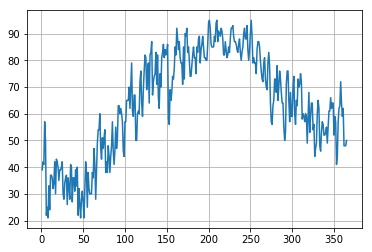

In [12]:
plt.plot(wea.yday, wea.Max_TemperatureF)
plt.grid();

Now join weather data to rides so we can plot # rides vs temperature for each day

In [14]:
comb = pd.merge(rides,wea,on='yday')
comb.head()

,yday,num_rides,date,st_code,Max_TemperatureF,Min_TemperatureF,Mean_TemperatureF,year,month
0,1,5317,2015-01-01 00:00:00,KLGA,39,27,33,2015,1
1,2,11304,2015-01-02 00:00:00,KLGA,42,35,39,2015,1
2,3,4478,2015-01-03 00:00:00,KLGA,41,31,36,2015,1
3,4,7849,2015-01-04 00:00:00,KLGA,57,41,49,2015,1
4,5,14506,2015-01-05 00:00:00,KLGA,50,22,36,2015,1


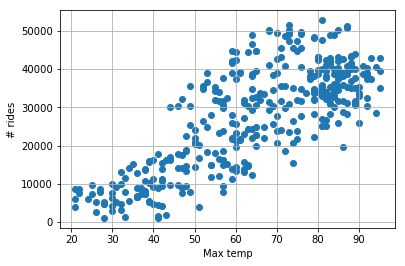

In [17]:
plt.scatter(comb.Max_TemperatureF,comb.num_rides)
plt.grid();
plt.xlabel('Max temp')
plt.ylabel('# rides')